In this code example, we have a graph being constructed of different Q values tied to different state-action pairs.  In the simplified example, there are 4 environment states, 3 with a specific target Q-value and an end state.  For each episode, we have a state: s, an action: a, and a future state: s'.  For the Q-Value there is a 'target' value.  For any state-action pair, we are trying to achieve an estimation of its value whenever this particular state-action pair appears in any instance of time such as throughout the course of a game or traning session.

If we take G1 as the estimation of the value when it first appears in an 'episode', then we can take the estimation of the next value as G2 for episode 2, and Gk for the k-th episode.  Using the monte carlo method, we can average this out to get our estimated Q values for all Gs.  As the simulation progresses through episodes, these averages will be evened out to target Q values in the manner of Qk = (G1 + G2 + G3...+ Gk) / k.  Thus, the Q value is updated after each subsequent game to get closer and closer to the target value, giving us limits to estimate as our final Q values.  We can rewrite this rule as:  Qk = Qk-1 + 1/k (Gk - Qk-1).  To generalize this formula we can say: NewEstimate = OldEstimate + StepSize(Target - OldEstimate).  This process is known as MC Learning or Monte Carlo Learning and is a model free approach.

The old estimate represents all of the combined Gk-1 values of previous iterations of the episodes.  We can consider Gk the 'target' because it contains a truer version of the estimated value we wish to approach over time.  With the memory or old knowledge of the previous values in Qk-1, and the new information contained in Gk, we can achieve 'learning'.  The term (Target - OldEstimate) is our error, or the difference between old knowledge and new information.  We include the step size (1/k) as a way to retain our old knowledge partially to improve our learning, as without it the equation just becomes: NewEstimate = OldEstimate + (Target - OldEstimate) = Target.  We have removed all of our previous knowledge and only the new information remains.  By using a step size that is less than 1, we can combine the old knowledge with the new so that over time the agent uses more and more memory of its past estimates to make better estimations of the target value.  Step size is generally symbolized as α in learning equations, and does not have to necessarily be a function of k.  The step size of 1/k is known as sample average.  We can choose a constant for our step size if we want though, which is known as constant-α.  Adjusting α can tune the learner of the equation and give it a bias towards specific information.  A smaller α value means the learner is biased towards old information, while a larger α (up to 1.0) will bias the newer information.  An α with a smaller value (such as 0.1) is known as a conservative learner and will be slow but steady in its learning, gradually moving forward in a steady curve without really taking the G values into account.  On the opposite end, an α with a larger value (such as 0.9) is known as a radical learner.  This type of learner ignores most of the past information, and therefore does not follow an average of the information, instead following the G values closely.

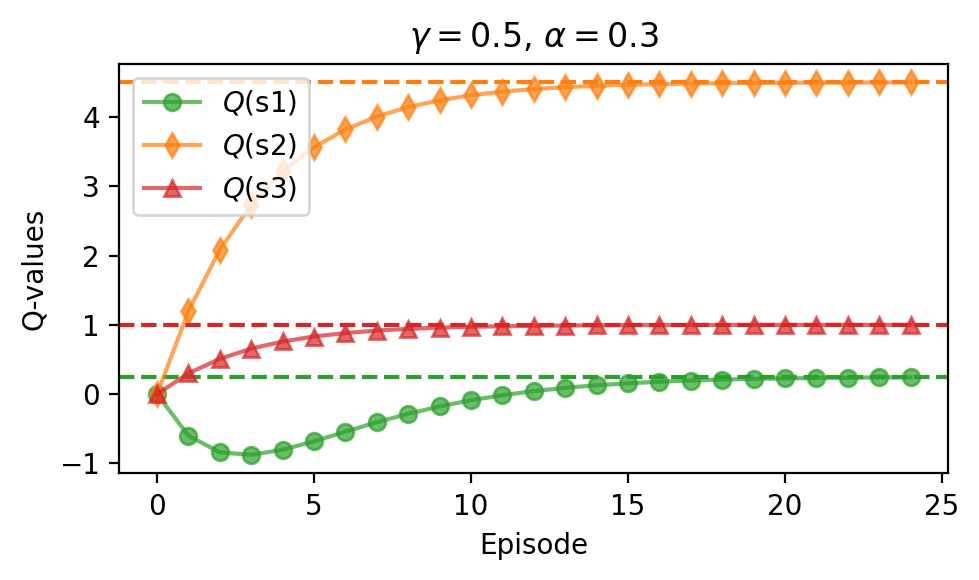

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

colors = ['#2ca02c', '#ff7f0e', '#d62728']
markers = ['o', 'd', '^']

gamma = 0.5
alpha = 0.3
n = 4
r_list = np.array([-2., 4., 1.])
epochs = 25
q_original = [0, 0, 0]

true_q = np.zeros(n - 1)
cur = 0
for j in range(len(true_q) - 1, -1, -1):
    true_q[j] = r_list[j] + gamma * cur
    cur = true_q[j]

q_table = np.zeros((epochs, n))

for j in range(n - 1):
    q_table[0, j] = q_original[j]

for x0 in range(1, epochs):
    for x1 in range(n - 1):
        learned = r_list[x1] + gamma * q_table[x0 - 1, x1 + 1] - q_table[x0 - 1, x1]
        q_table[x0, x1] = q_table[x0 - 1, x1] + alpha * learned

fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=200)
for j in range(n - 1):
    ax.plot(np.arange(epochs), q_table[:, j],
            marker=markers[j], markersize=6,
            alpha=0.7, color=colors[j], linestyle='-',
            label=f'$Q$' + f'(s{j + 1})')
    ax.axhline(y=true_q[j], color=colors[j], linestyle='--')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_ylabel('Q-values')
ax.set_xlabel('Episode')
ax.set_title(r'$\gamma = $' + f'{gamma}' + r', $\alpha =$' + f'{alpha}')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

For Q learning, it follows the same principle: NewEstimate = OldEstimate + α(Target - OldEstimate) but has a different target.  In the MC learner, the newly learned target is Gk which only depends on the series of rewards r recieved in the current episode regardless of any previous estimation of Q-values.  In a Q-learner, the newly learned target is: r + γQ(s') which involves the estimation of Q-values of other states rather than just rewards from future steps.  Q-learners also use bootstrapping, which is a term to describe the action of guessing the state-action pair's Q-value based on another state-action pair's Q-value which is also a guess.  An MC Learner needs to wait for the entire session to end before the Q-values are updated because the newly learned information, Gk, cannot be determined due to being the sum of the rewards of each step from the current episode to the end of the session.  A Q-learner uses r + γQ(s') as its new information, which is calculated at the current step rather than the end of the session.  Thus an MC Learner can be seen as updating statically after each session, while Q-Learning can be implemented dynamically to improve its performance over time.

In the simple example above, because only one action is available for each state, we can say:  Q(s,a) = r(s) + γMAXa'Q(s',a') which ends up being r(s) + γQ(s',a).
We have predetermined rewards (assigned to the r_list array in the code section) as -2(s1), 4(s2), and 1(s3).  The reward for the end state is given as 0 because there is no real choice of policy in this state, the episode ends therefore we omit the reward and state of s4.
To check the validity of the algorithm in the code, we can work this out by hand to see if the values line up.
Q(s3,a) = r(s3) + γQ(s4,a) which when given values becomes 1 + 0.5(0) = 1.
Q(s2,a) = r(s2) + γQ(s3,a) which becomes 4 + 0.5(1) = 4.5
Q(s1,a) = r(s1) + γQ(s2,a) which becomes -2 + 0.5(4.5) = 0.25

These values can be seen above in the graph as being our target values in the dotted lines so we know the algorithm is successful.

As it turns out, the initialization of the Q-values does not matter, as they will all eventually converge to the correct target values over time, so all the values are initialized as 0, which can be seen in the graph as the starting point for the three Q values.